# Exploring the Data & Pre-Processing

The following was accomplished in this notebook:

    - Exploration of the data
    - Filtering all businesses (restaurants to US-based only and updating the reviews and tips to reflect that according
    - Identify that a large chunk of users just leave tips and never go and write a review
    - Changing text data into strings to allow for pre-processing and cleaning
    - Identifying that tips are maxed at 500 characters and therefore will not need to be further truncated
    - Removing punctuation
    - Removing stop words
    - Apply Lemmatization (after also trying stemming, but decided against it based on how aggressive it was)
    - Developed test, train, and dev datasets
    - Tokenizing the tips data
    - applying bigrams and trigrams to the tips daa
    

In [2]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import re
import string
import nltk
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/avarezvani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/avarezvani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# importing the data
business = pd.read_csv("/Users/avarezvani/Downloads/yelp-dataset/business_restaurants.csv")
reviews = pd.read_csv("/Users/avarezvani/Downloads/yelp-dataset/reviews_restaurants.csv")
tips = pd.read_csv("/Users/avarezvani/Downloads/yelp-dataset/tips_restaurants.csv")

In [4]:
business.head()

,business_id,name,postal_code,stars,review_count,categories
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,L5R 3E7,2.5,128,"Specialty Food, Restaurants, Dim Sum, Imported..."
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese"
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,85016,3.0,18,"Restaurants, Breakfast & Brunch, Mexican, Taco..."
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,44060,4.0,16,"Italian, Restaurants, Pizza, Chicken Wings"
4,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,89119,4.0,40,"Restaurants, Italian"


In [5]:
# only want restaurants in the US so that way I can look at the reviews in English.
# should have done this in the other file, but will do some more clean up here and going forward
# as I have explored the data

business["postal_code"] = business["postal_code"].astype(str)
business = business[business.postal_code.apply(lambda x: x.isnumeric())]

In [6]:
business.head()

reviews = pd.merge(business, reviews, on = 'business_id')
tips = pd.merge(business, tips, on = "business_id")

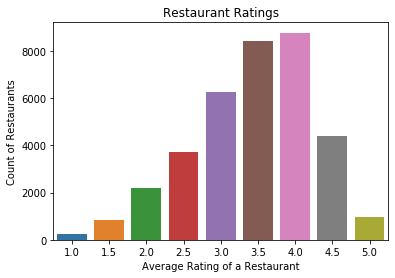

In [7]:
# viewing the restaurant ratings

ratings = business["stars"].value_counts()
ratings = ratings.sort_index()
sns.barplot(ratings.index, ratings.values)
plt.title("Restaurant Ratings")
plt.ylabel("Count of Restaurants")
plt.xlabel("Average Rating of a Restaurant")
plt.show()

In [8]:
reviews.head()
# learned here that the stars_x are the ratings of the restaurant, whereas the stars_y are the ratings from the individual.

,business_id,name_x,postal_code_x,stars,review_count_x,categories_x,name_y,postal_code_y,stars_x,review_count_y,categories_y,review_id,user_id,stars_y,useful,cool,text,date
0,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",F7POrJsNbhu493DSTMPXjw,nsS4oDfOsl20QdWc6XcOkw,2.0,1.0,0.0,"Husband was craving Chicken Teriyaki & gyoza, ...",2014-02-24 02:51:56
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",c-6aA9Bd7JxpmMroRoas9A,bK4Y_GZUoAUTXIrmeEUGYw,4.0,0.0,1.0,Went there Saturday noon they open at 12pm but...,2014-07-13 20:28:18
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",P_MV_lMQjLIO9R7M_KIuMg,sbbB6Y4yIZIInvt0LFYYew,2.0,1.0,0.0,Went to this restaurant on Saturday as I had a...,2018-05-09 00:39:36
3,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",dCLBdXP9tjjQG7EkHNeWzQ,hhQUVO2AqBdSeQcPo19Bsw,5.0,4.0,3.0,This place will always have a place in my stom...,2017-10-25 13:58:04
4,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",GiBx0zRVxC1Bu-9R-MMF8w,XSz4svDvgOCRO92V_3ajWg,4.0,0.0,0.0,"Well first time I've really had ""authentic"" Ja...",2015-04-02 01:13:36


In [9]:
# will rename those now
reviews = reviews.rename(columns={"stars_x": "restaurant_stars", "stars_y": "customer_stars"})

In [10]:
reviews.head()

,business_id,name_x,postal_code_x,stars,review_count_x,categories_x,name_y,postal_code_y,restaurant_stars,review_count_y,categories_y,review_id,user_id,customer_stars,useful,cool,text,date
0,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",F7POrJsNbhu493DSTMPXjw,nsS4oDfOsl20QdWc6XcOkw,2.0,1.0,0.0,"Husband was craving Chicken Teriyaki & gyoza, ...",2014-02-24 02:51:56
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",c-6aA9Bd7JxpmMroRoas9A,bK4Y_GZUoAUTXIrmeEUGYw,4.0,0.0,1.0,Went there Saturday noon they open at 12pm but...,2014-07-13 20:28:18
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",P_MV_lMQjLIO9R7M_KIuMg,sbbB6Y4yIZIInvt0LFYYew,2.0,1.0,0.0,Went to this restaurant on Saturday as I had a...,2018-05-09 00:39:36
3,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",dCLBdXP9tjjQG7EkHNeWzQ,hhQUVO2AqBdSeQcPo19Bsw,5.0,4.0,3.0,This place will always have a place in my stom...,2017-10-25 13:58:04
4,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",GiBx0zRVxC1Bu-9R-MMF8w,XSz4svDvgOCRO92V_3ajWg,4.0,0.0,0.0,"Well first time I've really had ""authentic"" Ja...",2015-04-02 01:13:36


In [11]:
# additionally, there must be restaurants that have the same name but different business ID.. let's explore that
restaurants_per_businessid = (business.groupby(["name"])["business_id"].count()).sort_values(ascending = False)

restaurants_per_businessid
# you can tell here that the most common restaurant chain is Subway, McDonald's, Taco Bell

name
Subway                                        648
McDonald's                                    576
Taco Bell                                     294
Burger King                                   266
Pizza Hut                                     251
Wendy's                                       232
Chipotle Mexican Grill                        167
Jimmy John's                                  154
Panda Express                                 148
KFC                                           144
Panera Bread                                  143
Domino's Pizza                                143
Papa John's Pizza                             139
Arby's                                        137
Starbucks                                     116
Dairy Queen                                   111
Denny's                                        98
Jersey Mike's Subs                             94
Little Caesars Pizza                           94
Sonic Drive-In                               

In [12]:
# I want to also look by the number of reviews per name

restaurants_per_reviewcount = (business.groupby(["name"])["review_count"].sum()).sort_values(ascending = False)

restaurants_per_reviewcount


name
McDonald's                         12314
Hash House A Go Go                 11534
Chipotle Mexican Grill              8639
Mon Ami Gabi                        8348
Bacchanal Buffet                    8339
Buffalo Wild Wings                  7008
In-N-Out Burger                     6800
Wicked Spoon                        6708
Panera Bread                        5928
Earl of Sandwich                    5712
Subway                              5638
Denny's                             5634
Yard House                          5604
The Cheesecake Factory              5552
Oregano's Pizza Bistro              5533
Grimaldi's Pizzeria                 5525
Gordon Ramsay BurGR                 5484
Tacos El Gordo                      5264
Shake Shack                         5071
Olive Garden Italian Restaurant     4962
Pita Jungle                         4939
Taco Bell                           4937
IHOP                                4884
Bachi Burger                        4808
Egg Works  

In [13]:
# making our "text" objects into "strings"

reviews["text"] = reviews["text"].astype(str)

tips["text"] = tips["text"].astype(str)
print(reviews.dtypes)
print(tips.dtypes)

business_id          object
name_x               object
postal_code_x        object
stars               float64
review_count_x        int64
categories_x         object
name_y               object
postal_code_y        object
restaurant_stars    float64
review_count_y        int64
categories_y         object
review_id            object
user_id              object
customer_stars      float64
useful              float64
cool                float64
text                 object
date                 object
dtype: object
business_id          object
name_x               object
postal_code_x        object
stars_x             float64
review_count_x        int64
categories_x         object
name_y               object
postal_code_y        object
stars_y             float64
review_count_y        int64
categories_y         object
user_id              object
text                 object
date                 object
compliment_count      int64
dtype: object


In [14]:
# how long are these reviews and tips anyways? let's assign length to their text

reviews["text_length"] = reviews["text"].apply(len)
tips["text_length"] = tips["text"].apply(len)

In [15]:
reviews.head()

,business_id,name_x,postal_code_x,stars,review_count_x,categories_x,name_y,postal_code_y,restaurant_stars,review_count_y,categories_y,review_id,user_id,customer_stars,useful,cool,text,date,text_length
0,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",F7POrJsNbhu493DSTMPXjw,nsS4oDfOsl20QdWc6XcOkw,2.0,1.0,0.0,"Husband was craving Chicken Teriyaki & gyoza, ...",2014-02-24 02:51:56,444
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",c-6aA9Bd7JxpmMroRoas9A,bK4Y_GZUoAUTXIrmeEUGYw,4.0,0.0,1.0,Went there Saturday noon they open at 12pm but...,2014-07-13 20:28:18,181
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",P_MV_lMQjLIO9R7M_KIuMg,sbbB6Y4yIZIInvt0LFYYew,2.0,1.0,0.0,Went to this restaurant on Saturday as I had a...,2018-05-09 00:39:36,930
3,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",dCLBdXP9tjjQG7EkHNeWzQ,hhQUVO2AqBdSeQcPo19Bsw,5.0,4.0,3.0,This place will always have a place in my stom...,2017-10-25 13:58:04,1431
4,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",GiBx0zRVxC1Bu-9R-MMF8w,XSz4svDvgOCRO92V_3ajWg,4.0,0.0,0.0,"Well first time I've really had ""authentic"" Ja...",2015-04-02 01:13:36,467


In [16]:
reviews["text_length"].describe()

count    3.424672e+06
mean     5.729347e+02
std      5.440097e+02
min      1.000000e+00
25%      2.220000e+02
50%      3.990000e+02
75%      7.290000e+02
max      5.000000e+03
Name: text_length, dtype: float64

In [17]:
tips["text_length"].describe()


# given that we will be focusing on tips going forward, we can see that the max length is 500, which means that they are limited to that amount.
# therefore, we do not need to shorten or lengthen them any more.

count    694740.000000
mean         61.275497
std          56.088981
min           1.000000
25%          27.000000
50%          48.000000
75%          75.000000
max         500.000000
Name: text_length, dtype: float64

In [18]:
tips.head()
# realizing that there are no tips_id assigned to any of these

,business_id,name_x,postal_code_x,stars_x,review_count_x,categories_x,name_y,postal_code_y,stars_y,review_count_y,categories_y,user_id,text,date,compliment_count,text_length
0,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",JysF40STBTmx7h-sU1FHgg,Tonkatsu Ramen!!!,2013-02-20 23:22:46,0,17
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",FyikYazQbNoOumDooOQyyA,"Ramen, Gyoza, miso soup and green tea ice crea...",2018-01-19 05:31:59,0,59
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",FyikYazQbNoOumDooOQyyA,Best ramen I've had in the Charlotte area,2017-04-08 05:34:25,0,41
3,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",7M-rWYRGPfCDnb7tjl7QGQ,Get whatever lunch special A or B is. Trust me...,2011-11-19 18:19:24,0,66
4,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",MZFUSBTj7RDpf19v5qP9HA,Best Chirazshi in town!,2016-02-26 22:43:31,0,23


In [19]:
# assigning tips_id to them now

tips["tips_id"] = range(len(tips))

tips.head()

,business_id,name_x,postal_code_x,stars_x,review_count_x,categories_x,name_y,postal_code_y,stars_y,review_count_y,categories_y,user_id,text,date,compliment_count,text_length,tips_id
0,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",JysF40STBTmx7h-sU1FHgg,Tonkatsu Ramen!!!,2013-02-20 23:22:46,0,17,0
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",FyikYazQbNoOumDooOQyyA,"Ramen, Gyoza, miso soup and green tea ice crea...",2018-01-19 05:31:59,0,59,1
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",FyikYazQbNoOumDooOQyyA,Best ramen I've had in the Charlotte area,2017-04-08 05:34:25,0,41,2
3,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",7M-rWYRGPfCDnb7tjl7QGQ,Get whatever lunch special A or B is. Trust me...,2011-11-19 18:19:24,0,66,3
4,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",MZFUSBTj7RDpf19v5qP9HA,Best Chirazshi in town!,2016-02-26 22:43:31,0,23,4


In [24]:
tips_counts = (tips.groupby(["name_x"])["tips_id"].count()).sort_values(ascending = False)

print(tips_counts)

# follows a similar patterns as the reviews, though there is "In-N-Out Burger" and "Chipotle Mexican Grill" that
# ranks higher in the tips than in the reviews

name_x
McDonald's                           3511
In-N-Out Burger                      2609
Chipotle Mexican Grill               2357
Hash House A Go Go                   2140
Buffalo Wild Wings                   2136
Yard House                           1796
Subway                               1725
Starbucks                            1664
Earl of Sandwich                     1661
Panera Bread                         1575
The Cosmopolitan of Las Vegas        1487
Egg Works                            1463
Bachi Burger                         1435
Grimaldi's Pizzeria                  1431
Smashburger                          1420
Tropical Smoothie Cafe               1410
Wicked Spoon                         1386
Five Guys                            1376
Gangnam Asian BBQ Dining             1371
Denny's                              1355
The Cheesecake Factory               1345
Taco Bell                            1343
Olive Garden Italian Restaurant      1331
Pita Jungle                

In [25]:
tip_dups = tips.drop_duplicates(subset="user_id", keep='first')
tip_dups.count()

reviews_dups = reviews.drop_duplicates(subset="user_id", keep="first")
reviews_dups.count()

business_id         994246
name_x              994246
postal_code_x       994246
stars               994246
review_count_x      994246
categories_x        994246
name_y              994246
postal_code_y       994246
restaurant_stars    994246
review_count_y      994246
categories_y        994246
review_id           994246
user_id             994246
customer_stars      994246
useful              994246
cool                994246
text                994246
date                994245
text_length         994246
dtype: int64

In [26]:
# How many folks are doing tips but not reviews?
tips_dups_in_reviews = reviews_dups.user_id.isin(tip_dups.user_id).astype(str)
reviews_dups_in_tips = tip_dups.user_id.isin(reviews_dups.user_id).astype(str)

In [27]:
tips_dups_in_reviews.describe()
reviews_dups_in_tips.describe()

# shows that there 22,034 folks who are not filling out reviews, and just filling out the tips

count     218949
unique         2
top         True
freq      196915
Name: user_id, dtype: object

### Accomplishing Pre-processing Goals

In [28]:
# write these back to their original documents
reviews.head()

,business_id,name_x,postal_code_x,stars,review_count_x,categories_x,name_y,postal_code_y,restaurant_stars,review_count_y,categories_y,review_id,user_id,customer_stars,useful,cool,text,date,text_length
0,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",F7POrJsNbhu493DSTMPXjw,nsS4oDfOsl20QdWc6XcOkw,2.0,1.0,0.0,"Husband was craving Chicken Teriyaki & gyoza, ...",2014-02-24 02:51:56,444
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",c-6aA9Bd7JxpmMroRoas9A,bK4Y_GZUoAUTXIrmeEUGYw,4.0,0.0,1.0,Went there Saturday noon they open at 12pm but...,2014-07-13 20:28:18,181
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",P_MV_lMQjLIO9R7M_KIuMg,sbbB6Y4yIZIInvt0LFYYew,2.0,1.0,0.0,Went to this restaurant on Saturday as I had a...,2018-05-09 00:39:36,930
3,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",dCLBdXP9tjjQG7EkHNeWzQ,hhQUVO2AqBdSeQcPo19Bsw,5.0,4.0,3.0,This place will always have a place in my stom...,2017-10-25 13:58:04,1431
4,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",GiBx0zRVxC1Bu-9R-MMF8w,XSz4svDvgOCRO92V_3ajWg,4.0,0.0,0.0,"Well first time I've really had ""authentic"" Ja...",2015-04-02 01:13:36,467


In [29]:
tips = pd.read_csv("/Users/avarezvani/Downloads/yelp-dataset/tips_restaurants.csv")
tips = pd.merge(business, tips, on = "business_id")
tips["text"] = tips["text"].astype(str)
tips["text_length"] = tips["text"].apply(len)
tips["tips_id"] = range(len(tips))

In [30]:
# Goal 1: remove all punctuation

def remove_punctuations(x):
    for punctuation in string.punctuation:
        x = x.replace(punctuation, "")
    return x

tips["text_new"] = tips["text"].apply(remove_punctuations)

In [31]:
#check that goal 1 was accomplished -- YES
tips["text_new"].head()

0                                       Tonkatsu Ramen
1    Ramen Gyoza miso soup and green tea ice cream ...
2             Best ramen Ive had in the Charlotte area
3    Get whatever lunch special A or B is Trust me ...
4                               Best Chirazshi in town
Name: text_new, dtype: object

In [32]:
# Goal: Max out tips to a certain character count
# This is no longer a goal, given that all tips are limited to 500 characters. I am okay with this amount of text to work with.

In [33]:
# Goal 2: make everything lowercase
def make_lowercase(x):
    x = x.lower()
    return x

tips["text_new"] = tips["text_new"].apply(make_lowercase)

In [34]:
#check that goal 2 was accomplished-- YES
tips["text_new"].head()

0                                       tonkatsu ramen
1    ramen gyoza miso soup and green tea ice cream ...
2             best ramen ive had in the charlotte area
3    get whatever lunch special a or b is trust me ...
4                               best chirazshi in town
Name: text_new, dtype: object

In [35]:
# Goal 3 remove stopwords -- YES
stop = stopwords.words("english")
stop

tips["text_new"] = tips["text_new"].apply(lambda x: [word for word in x.split() if word not in stop and len(word) >2])

In [36]:
tips["text_new"].head()

0                                    [tonkatsu, ramen]
1    [ramen, gyoza, miso, soup, green, tea, ice, cr...
2                  [best, ramen, ive, charlotte, area]
3               [get, whatever, lunch, special, trust]
4                              [best, chirazshi, town]
Name: text_new, dtype: object

In [37]:
# Goal 4: Stemming -- will test this first and see if we like the results
# could lose a lot of good data

stemmer = PorterStemmer()
def stemming(x):
    stemming_text = " ".join([stemmer.stem(i) for i in x])
    return stemming_text

In [38]:
tips["text_new_stem"] = tips["text_new"].apply(lambda x: stemming(x))

In [39]:
tips["text_new_stem"].head()

0                                     tonkatsu ramen
1    ramen gyoza miso soup green tea ice cream great
2                       best ramen ive charlott area
3                     get whatev lunch special trust
4                                best chirazshi town
Name: text_new_stem, dtype: object

In [40]:
# Goal 5: Lemmatization -- now trying this to see the results - YES
# we like this better because it maintains the integrity of most of the words

lemmatizer = WordNetLemmatizer()
def lemmatize(x):
    lemmatizer_text = " ".join([lemmatizer.lemmatize(i) for i in x])
    return lemmatizer_text

In [41]:
tips["text_new_lemm"] = tips["text_new"].apply(lambda x: lemmatize(x))

In [42]:
tips["text_new"] = tips["text_new_lemm"]
tips["text_new"].head()

0                                     tonkatsu ramen
1    ramen gyoza miso soup green tea ice cream great
2                      best ramen ive charlotte area
3                   get whatever lunch special trust
4                                best chirazshi town
Name: text_new, dtype: object

### Develop the test, dev, and train

In [43]:
tips.describe()

# given that the size of the the tips is 694,740
# will be splitting up into train, dev, test into 60:20:20, using all of the data.


# before splitting, let's just clean up some of our extra/duplicate columns
del tips["name_x"]
del tips["postal_code_x"]
del tips ["stars_x"]
del tips ["review_count_x"]
del tips ["categories_x"]
del tips ["text_new_stem"]
del tips ["text_new_lemm"]


In [44]:
tips.head()
# then renaming the cells with the y's back to their normal names
tips.rename(columns={"name_y": "name", "postal_code_y": "postal_code", "stars_y": "stars", "review_count_y": "review_count",
                    "categories_y": "categories"}, inplace=True)

In [45]:
tips.head()

,business_id,name,postal_code,stars,review_count,categories,user_id,text,date,compliment_count,text_length,tips_id,text_new
0,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",JysF40STBTmx7h-sU1FHgg,Tonkatsu Ramen!!!,2013-02-20 23:22:46,0,17,0,tonkatsu ramen
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",FyikYazQbNoOumDooOQyyA,"Ramen, Gyoza, miso soup and green tea ice crea...",2018-01-19 05:31:59,0,59,1,ramen gyoza miso soup green tea ice cream great
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",FyikYazQbNoOumDooOQyyA,Best ramen I've had in the Charlotte area,2017-04-08 05:34:25,0,41,2,best ramen ive charlotte area
3,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",7M-rWYRGPfCDnb7tjl7QGQ,Get whatever lunch special A or B is. Trust me...,2011-11-19 18:19:24,0,66,3,get whatever lunch special trust
4,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,28210,4.0,170,"Sushi Bars, Restaurants, Japanese",MZFUSBTj7RDpf19v5qP9HA,Best Chirazshi in town!,2016-02-26 22:43:31,0,23,4,best chirazshi town


In [446]:
from sklearn.model_selection import train_test_split

train, dev, test = np.split(tips.sample(frac=1), [int(.6*len(tips)), int(.8*len(tips))])

In [447]:
print(train.count())
train.head()


business_id         416844
name                416844
postal_code         416844
stars               416844
review_count        416844
categories          416844
user_id             416844
text                416844
date                416844
compliment_count    416844
text_length         416844
tips_id             416844
text_new            416844
dtype: int64


,business_id,name,postal_code,stars,review_count,categories,user_id,text,date,compliment_count,text_length,tips_id,text_new
656187,iBihgoxc6Ot7m2D4D3z0QA,Thirsty Lion Gastropub & Grill,85281,3.5,659,"Gastropubs, Bars, Nightlife, American (Traditi...",QL628fryTs0YTdhQ9Jtj8w,"if you are thirsty, do not come here. been wai...",2017-08-25 00:22:36,0,99,656187,thirsty come waiting minute even greeted table
231735,bzbNGyrTwWHAgg1CqkSgeg,Terrace Restaurants,28210,4.0,634,"Comfort Food, Breakfast & Brunch, American (Tr...",QxrmO9IKZc68E2npuN9p8w,The food is delicious. Be sure to check out th...,2017-08-08 23:45:00,0,123,231735,food delicious sure check dinner menu yes red ...
533830,kJwWVi3uCXniUkJwhS3N3Q,Thai Gourmet,85392,4.5,246,"Restaurants, Thai",PbWISrxPCOe7L7g7hboZnw,"Thai hot ain't no joke you guys, but I LOVE it!",2014-04-17 21:02:11,0,47,533830,thai hot aint joke guy love
511914,F9v9bdFqp-GxMEjABRoDyA,Starbucks,85225,4.0,37,"Food, Restaurants, Coffee & Tea",P3HZg5WODEMNaI1xLLIMyQ,Tall non-fat creme brûlée latte w/ light whipp...,2010-12-11 17:38:24,0,55,511914,tall nonfat creme brûlée latte light whipped c...
458871,6tLL1P8k9drb7MJEVwmRhg,Papago Brewing,85257,4.0,448,"Nightlife, Breweries, Wraps, Sandwiches, Food,...",mwIOkmzu6BVCE9emTaqGPA,Orange Blossom... My favorite beer!,2014-01-29 00:02:38,0,35,458871,orange blossom favorite beer


In [448]:
print(dev.count())
dev.head()

business_id         138948
name                138948
postal_code         138948
stars               138948
review_count        138948
categories          138948
user_id             138948
text                138948
date                138948
compliment_count    138948
text_length         138948
tips_id             138948
text_new            138948
dtype: int64


,business_id,name,postal_code,stars,review_count,categories,user_id,text,date,compliment_count,text_length,tips_id,text_new
271479,sLKpRaFns5Uqw1IEzK6obA,Z's Greek,85016,4.5,432,"Mediterranean, Greek, Restaurants, Food",qtXSsVLbKvZ59eOImHqvbA,Gyros are off the chain! Super tender lamb!,2015-11-05 19:41:52,0,43,271479,gyro chain super tender lamb
623165,rW5N-fiNhqb-fR3bGqyPdg,Rosie McCaffrey's Irish Pub & Restaurant,85014,3.5,326,"Irish Pub, Bars, Pubs, Irish, Nightlife, Resta...",BdBStnBS1OZSQOnaojhCdQ,Awesome fish and chips,2017-08-11 22:22:22,0,22,623165,awesome fish chip
32823,yNPh5SO-7wr8HPpVCDPbXQ,The Arrogant Butcher,85004,4.0,1972,"American (New), American (Traditional), Bars, ...",KGsXnYHvYddGaL_jyl0DMQ,Thank you for the lovely gift Rhonda,2011-11-17 00:36:54,0,36,32823,thank lovely gift rhonda
578282,8bYXg27QEoAx7us15eIL5g,Applebee's Grill + Bar,89102,2.0,105,"Chicken Wings, Nightlife, Restaurants, Fast Fo...",4f_lBxtaCCg1d2uSU0we-g,The server was great and the food came out fast,2018-07-16 23:15:12,0,47,578282,server great food came fast
528170,vbUABNAQI2iwN7v0xSqG9g,Popeye's Chicken,28025,2.0,8,"American (Traditional), Restaurants",bpdZJWWGz5arfM83HzQ9mw,Love the chicken,2015-02-04 00:31:14,0,16,528170,love chicken


In [449]:
print(test.count())
test.head()

business_id         138948
name                138948
postal_code         138948
stars               138948
review_count        138948
categories          138948
user_id             138948
text                138948
date                138948
compliment_count    138948
text_length         138948
tips_id             138948
text_new            138948
dtype: int64


,business_id,name,postal_code,stars,review_count,categories,user_id,text,date,compliment_count,text_length,tips_id,text_new
149574,X2zVoSi1X-Hgz_95hzvF8w,Dragon Express,28078,2.0,24,"Chinese, Restaurants",LOIjT4sFMRhVw_QXLhxWuw,Good and plenty,2016-07-22 22:31:34,0,15,149574,good plenty
413607,1ZnVfS-qP19upP_fwOhZsA,Big Wong Restaurant,89146,4.0,949,"Chinese, Restaurants, Noodles, Taiwanese, Mala...",Qz4DFODHhmVfPpYsYwnMPw,The Hai Nan Chicken Rice is a must !,2015-06-17 17:04:23,0,36,413607,hai nan chicken rice must
492851,tsf1JNdeeQf_654YUSrzRw,McMullan's Irish Pub,89103,4.5,519,"Music Venues, Arts & Entertainment, Nightlife,...",yvAYprNnakItO2O4zjDHtw,The sliders are so yummy and fresh! Food takes...,2012-08-27 20:27:55,0,75,492851,slider yummy fresh food take thats good sign
337120,6C6GRESqx2bDxgMHN7LUXg,Kings,15044,2.5,13,"Restaurants, American (Traditional), American ...",HjJmyXsZF5TELjRMz1ph8w,Not great.,2017-12-31 20:30:59,0,10,337120,great
471926,RcAYhVDobQ9nE9qHUOOSsA,The Habit Burger Grill,85226,3.5,207,"Burgers, Restaurants",efMDfLm2k7LY6l5sg4t8fQ,Worst design of a restroom ever! You get hit b...,2015-02-23 01:24:29,0,221,471926,worst design restroom ever get hit door waitin...


In [450]:
## saving the train, dev, and test sets

train.to_csv("/Users/avarezvani/Downloads/yelp-dataset/tips_train.csv", index=False)
dev.to_csv("/Users/avarezvani/Downloads/yelp-dataset/tips_dev.csv", index=False)
test.to_csv("/Users/avarezvani/Downloads/yelp-dataset/tips_test.csv", index=False)

In [46]:
tips.to_csv("/Users/avarezvani/Downloads/yelp-dataset/tips_final.csv", index=False)



### Tokenizing

In [1]:
def tokenize_sentences(sentences):
    for x in sentences:
        yield(gensim.utils.simple_preprocess(str(x)))

tokens = list(tokenize_sentences(tips.text_new.values.tolist()))

print(tokens[0:9])

NameError: name 'tips' is not defined

### Developing model for Bigrams & Trigrams with gensim

In [ ]:
bigram = gensim.models.Phrases(tokens, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[tokens], threshold=100)

In [ ]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [ ]:
data_words_bigrams = make_bigrams(tokens)

data_words_trigrams = make_trigrams(tokens)

print(data_words_bigrams[0:9])

# note the first bigram seen with "tokatsu_ramen"

### Word Cloud Exploration

In [ ]:
# Baseline with a word cloud
words = str(data_words_bigrams)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()